### Student Information:
### ● Name :Snehal Sunil Bankar
### ● Roll Number:202201070020
### ● Batch:T1


# Logistic Regression

In [ ]:
# Importing libraries
import time, psutil, os, math
from tqdm.contrib import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split

In [ ]:
# Logistic function
def logistic(x):

    y = 1 / (1 + np.exp(-x))
    return y

x, x_arr = 0, np.array([-2, -1, 1, 2])
print(f"logistic({x}) = {logistic(x)}")
print(f"logistic({x_arr}) = {logistic(x_arr)}")

logistic(0) = 0.5
logistic([-2 -1  1  2]) = [0.11920292 0.26894142 0.73105858 0.88079708]


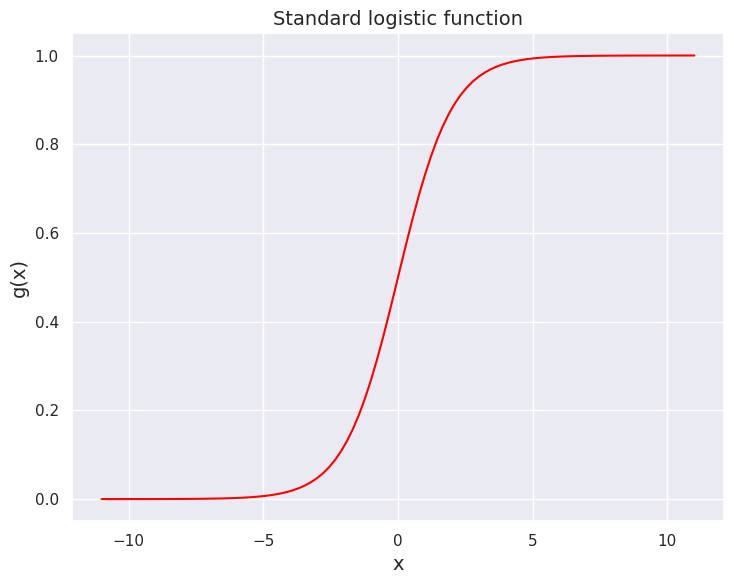

In [ ]:
# Plotting the logistic function
plt.figure(figsize = (7.5, 6))
x = np.linspace(-11, 11, 100)

plt.plot(x, logistic(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

## From libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('/content/Employee (1).csv')

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)  # This avoids dummy variable trap

# Define features and target variable
X = df.drop(columns=['LeaveOr0t'])  # 'LeaveOr0t' is the target variable
y = df['LeaveOr0t']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.6500

Confusion Matrix:
 [[12  2]
 [ 5  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.33      0.17      0.22         6

    accuracy                           0.65        20
   macro avg       0.52      0.51      0.50        20
weighted avg       0.59      0.65      0.61        20



#Sigmoid

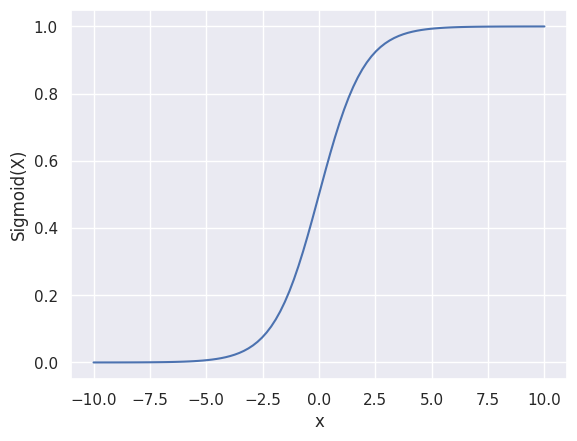

In [ ]:
# Import matplotlib, numpy and math
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid(True)

plt.show()


# tanh function

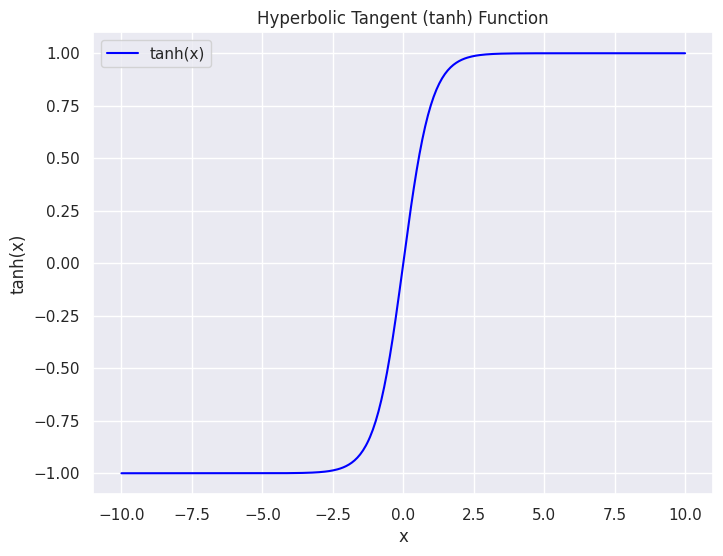

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tanh function
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Generate an array of values from -10 to 10
x = np.linspace(-10, 10, 400)
y = tanh(x)

# Plot the tanh function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='tanh(x)', color='blue')
plt.title('Hyperbolic Tangent (tanh) Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()
plt.show()

# ReLU Function

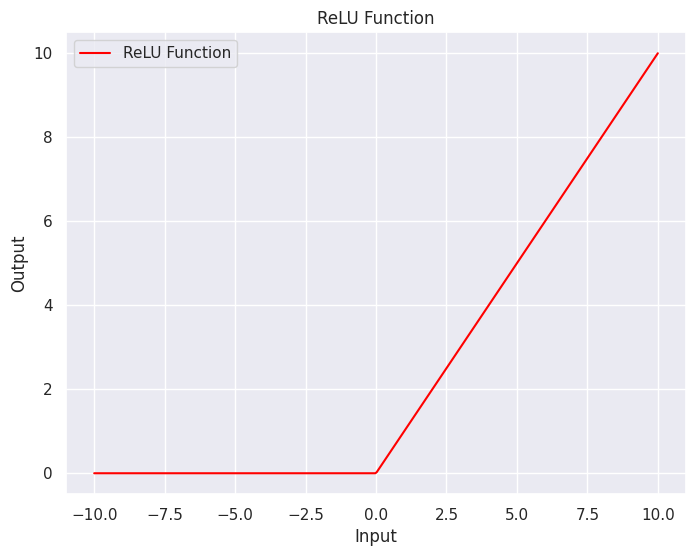

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate an array of values from -10 to 10
x = np.linspace(-10, 10, 400)
y = relu(x)

# Plot the ReLU function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU Function', color='red')
plt.title('ReLU Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

# Log loss

# Cost function - using vectorization

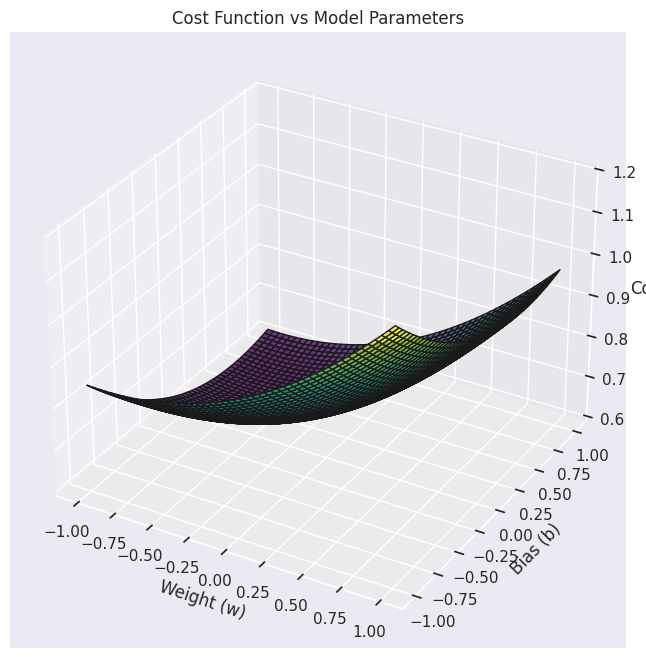

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import expit as logistic
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('/content/Employee (1).csv')

# Define features (X) and target (y)
X = df.drop(columns=['LeaveOr0t'])  # 'LeaveOr0t' is the target variable
y = df['LeaveOr0t']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert target to binary classification (e.g., above median is 1, below is 0)
y_train = (y_train > np.median(y_train)).astype(int)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Select only the first feature for visualization purposes
X_train = X_train[:, :1]

def cost_func_vec(y, y_dash):
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    return log_loss(y, y_dash)  # Directly apply log_loss on entire arrays

def cost_logreg_vec(X, y, w, b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = np.matmul(X, w) + (b * np.ones(m))
    y_dash = logistic(z)
    cost = cost_func_vec(y, y_dash)
    return cost

# Define range for weights and bias
w_vals, b_vals = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))

# Compute cost for each (w, b) pair
cost_vals = np.array([[cost_logreg_vec(X_train, y_train, np.array([w0]), b0) for b0 in b_vals[:, 0]] for w0 in w_vals[0]])

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_vals, b_vals, cost_vals, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Cost")
ax.set_title("Cost Function vs Model Parameters")
plt.show()

# Logistic Regression with Log-Loss

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-Loss function
def compute_log_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent for logistic regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        # Predict probabilities
        z = np.dot(X, weights)
        predictions = sigmoid(z)

        # Compute gradients
        gradient = np.dot(X.T, (predictions - y)) / m

        # Update weights
        weights -= learning_rate * gradient

        # Compute and print log loss
        if epoch % 100 == 0:
            log_loss = compute_log_loss(y, predictions)
            print(f"Epoch {epoch}, Log-Loss: {log_loss:.4f}")
    return weights

# Load data
df = pd.read_csv('/content/Employee (1).csv')

# Define features (X) and target (y)
X = df.drop(columns=['LeaveOr0t'])  # 'LeaveOr0t' is the target variable
y = df['LeaveOr0t']

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add an intercept term (bias) to the features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Train the logistic regression model
learning_rate = 0.1
epochs = 1000
weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Make predictions on the test set
z_test = np.dot(X_test, weights)
y_test_pred = sigmoid(z_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Compute test log-loss and accuracy
test_log_loss = compute_log_loss(y_test, y_test_pred)
accuracy = np.mean(y_test_pred_binary == y_test)
print(f"\nTest Log-Loss: {test_log_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Log-Loss: 0.6931
Epoch 100, Log-Loss: 0.5841
Epoch 200, Log-Loss: 0.5821
Epoch 300, Log-Loss: 0.5820
Epoch 400, Log-Loss: 0.5820
Epoch 500, Log-Loss: 0.5820
Epoch 600, Log-Loss: 0.5820
Epoch 700, Log-Loss: 0.5820
Epoch 800, Log-Loss: 0.5820
Epoch 900, Log-Loss: 0.5820

Test Log-Loss: 0.6005
Test Accuracy: 0.6500
